In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [24]:
final_df = pd.read_csv('data/final.csv')

In [25]:
print(final_df.shape)
final_df.head()

(54734, 19)


,Unnamed: 0,title_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,studio,domestic_gross,foreign_gross,year,total_gross
0,0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",1,Wazir,NaN,NaN,original,NaN,1.0,Relbig.,1100000.0,0.0,2016,0.0011
1,1,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",2,64 Squares,NaN,NaN,NaN,NaN,0.0,Relbig.,1100000.0,0.0,2016,0.0011
2,2,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",3,Wazir,IN,NaN,NaN,NaN,0.0,Relbig.,1100000.0,0.0,2016,0.0011
3,3,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",4,Move 5,IN,en,working,NaN,0.0,Relbig.,1100000.0,0.0,2016,0.0011
4,4,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",5,The Last Square,IN,en,working,NaN,0.0,Relbig.,1100000.0,0.0,2016,0.0011


### 1. Import `basics_df`, `ratings_df` and `budgets_df`

In [68]:
basics_df = pd.read_csv('./data/imdb.title.basics.csv.gz')
print(basics_df.shape)
basics_df.head()

(146144, 6)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [69]:
ratings_df = pd.read_csv('data/imdb.title.ratings.csv.gz')
print(ratings_df.shape)
ratings_df.head()

(73856, 3)


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [85]:
budgets_df = pd.read_csv('data/tn.movie_budgets.csv.gz')
print(budgets_df.shape)
budgets_df.head()

(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### 2. Merge `basics_df` with `ratings_df`

In [72]:
basics_ratings = pd.merge(basics_df, ratings_df, how='left', on='tconst')
print(basics_ratings.shape)
basics_ratings.head()

(146144, 8)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


Check for rows where `averagerating` is null

In [81]:
basics_ratings = basics_ratings[basics_ratings.averagerating.isnull() == False]#.shape # 73856 out of 146144

In [83]:
73856/146144 # only 50% of movies have ratings info

0.5053645719290563

### 3. Merge `basics_ratings` with `budgets_df`

In [86]:
basics_ratings.shape

(73856, 8)

In [88]:
basics_ratings_budgets = pd.merge(basics_ratings, budgets_df, how='left', left_on='primary_title', right_on='movie')
print(basics_ratings_budgets.shape)
basics_ratings_budgets.head()

(73979, 14)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN,NaN,NaN,NaN


Check for rows where `production_budget` is null

In [162]:
brb = basics_ratings_budgets[basics_ratings_budgets.production_budget.isnull() == False] # 2875 out of 73979
brb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,26.0,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
33,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,7.5,24.0,21.0,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
41,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
51,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"


In [163]:
2875/73979 # only 3% of movies have budget info

0.03886237986455616

### 4. Start building plots!

In [164]:
brb = brb[['primary_title','start_year','runtime_minutes','genres','averagerating','numvotes','production_budget','domestic_gross','worldwide_gross']].copy()
print(brb.shape)
brb.head()

(2875, 9)


,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
16,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,"$45,000,000",$0,"$73,706"
33,The Overnight,2010,88.0,NaN,7.5,24.0,"$200,000","$1,109,808","$1,165,996"
41,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,"$25,000,000","$720,828","$9,313,302"
47,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,"$91,000,000","$58,236,838","$187,861,183"
51,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,"$28,000,000","$26,017,685","$62,108,587"


In [165]:
brb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 16 to 73968
Data columns (total 9 columns):
primary_title        2875 non-null object
start_year           2875 non-null int64
runtime_minutes      2757 non-null float64
genres               2867 non-null object
averagerating        2875 non-null float64
numvotes             2875 non-null float64
production_budget    2875 non-null object
domestic_gross       2875 non-null object
worldwide_gross      2875 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 168.5+ KB


In [166]:
brb.production_budget = brb.production_budget.str.replace(',','').str.strip('$').astype(int)
brb.domestic_gross = brb.domestic_gross.str.replace(',','').str.strip('$').astype(int)
brb.worldwide_gross = brb.worldwide_gross.str.replace(',','').str.strip('$').apply(lambda x: int(x))

In [168]:
brb.head()

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
16,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,45000000,0,73706
33,The Overnight,2010,88.0,NaN,7.5,24.0,200000,1109808,1165996
41,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,25000000,720828,9313302
47,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,91000000,58236838,187861183
51,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,28000000,26017685,62108587


Do some feature engineering

In [230]:
brb['net_revenue'] = (brb.worldwide_gross - brb.production_budget) / 1000000
brb['log_numvotes'] = np.log(brb.numvotes)
brb['scaled_rating'] = brb.log_numvotes * brb.averagerating / 127
# brb.sort_values('net_revenue')

In [231]:
brb.describe()

,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,net_revenue,log_numvotes,scaled_rating
count,2875.000000,2757.000000,2875.000000,2.875000e+03,2.875000e+03,2.875000e+03,2.875000e+03,2875.000000,2875.000000,2875.000000
mean,2013.916522,102.945956,6.249217,6.628038e+04,3.436427e+07,4.302909e+07,1.029130e+08,68.548774,8.135798,0.404547
std,2.550258,20.788982,1.185992,1.343077e+05,4.774360e+07,7.452513e+07,2.037115e+08,169.256901,3.498062,0.202595
min,2010.000000,3.000000,1.600000,5.000000e+00,1.400000e+03,0.000000e+00,0.000000e+00,-200.237650,1.609438,0.035484
25%,2012.000000,90.000000,5.600000,1.410000e+02,5.000000e+06,5.017520e+05,2.276072e+06,-2.456701,4.948760,0.222321
50%,2014.000000,101.000000,6.400000,7.951000e+03,1.700000e+07,1.652141e+07,3.006380e+07,9.650000,8.981053,0.406569
75%,2016.000000,113.000000,7.100000,7.508100e+04,4.000000e+07,5.186291e+07,1.015694e+08,63.073958,11.226322,0.568748
max,2019.000000,280.000000,9.300000,1.841066e+06,4.250000e+08,7.605076e+08,2.776345e+09,2351.345279,14.425855,0.999587


In [232]:
brb.head(2)

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,net_revenue,log_numvotes,scaled_rating
16,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,45000000,0,73706,-44.926294,9.017726,0.134911
33,The Overnight,2010,88.0,NaN,7.5,24.0,200000,1109808,1165996,0.965996,3.178054,0.187680


### Plotting ROI vs. Rating

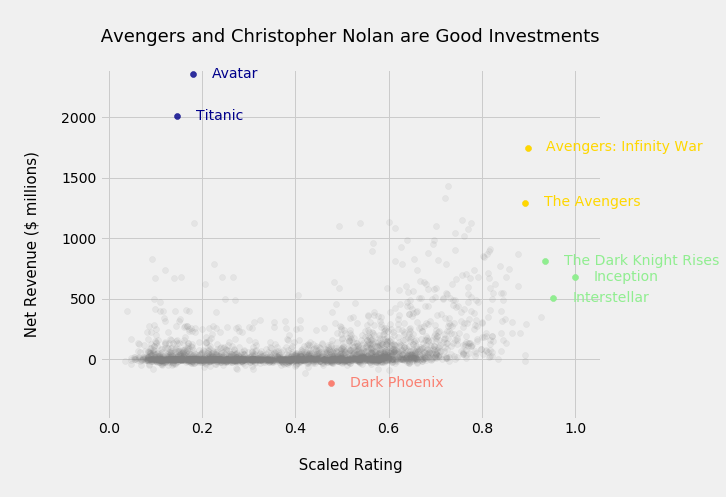

In [304]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

top_left = brb[(brb.net_revenue > 2000)]
top_right = brb[(brb.net_revenue > 1000) & (brb.scaled_rating > 0.8)]
far_right = brb[(brb.net_revenue > 500) & (brb.scaled_rating > 0.9)]
bottom = brb[(brb.net_revenue < -200)]

ax.scatter(brb.scaled_rating, brb.net_revenue, alpha=0.1, color='grey')
ax.scatter(top_left['scaled_rating'], top_left['net_revenue'], color='darkblue', alpha=0.8)
ax.scatter(top_right['scaled_rating'], top_right['net_revenue'], color='gold', alpha=1)
ax.scatter(far_right['scaled_rating'], far_right['net_revenue'], color='lightgreen', alpha=1)
ax.scatter(bottom['scaled_rating'], bottom['net_revenue'], color='salmon', alpha=1)

for i, row in top_left.iterrows():
    plt.text(row.scaled_rating+.04, row.net_revenue-30, row.primary_title, color='darkblue')
for i, row in top_right.iterrows():
    plt.text(row.scaled_rating+.04, row.net_revenue-30, row.primary_title, color='gold')
for i, row in far_right.iterrows():
    plt.text(row.scaled_rating+.04, row.net_revenue-30, row.primary_title, color='lightgreen')
for i, row in bottom.iterrows():
    plt.text(row.scaled_rating+.04, row.net_revenue-30, row.primary_title, color='salmon')

ax.set_title('\n Avengers and Christopher Nolan are Good Investments \n', size=18)
ax.set_xlabel('\n Scaled Rating \n', size=15)
ax.set_ylabel('\n Net Revenue ($ millions) \n', size=15)
ax.set_ylim(-490, 2400);

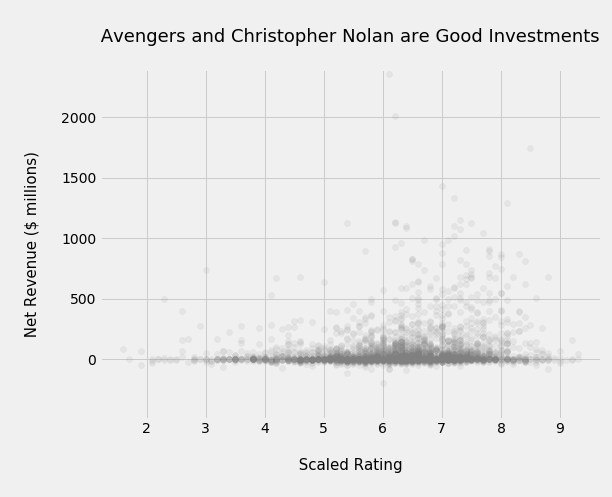

In [305]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

top_left = brb[(brb.net_revenue > 2000)]
top_right = brb[(brb.net_revenue > 1000) & (brb.scaled_rating > 0.8)]
far_right = brb[(brb.net_revenue > 500) & (brb.scaled_rating > 0.9)]
bottom = brb[(brb.net_revenue < -200)]

ax.scatter(brb.averagerating, brb.net_revenue, alpha=0.1, color='grey')
# ax.scatter(top_left['scaled_rating'], top_left['net_revenue'], color='darkblue', alpha=0.8)
# ax.scatter(top_right['scaled_rating'], top_right['net_revenue'], color='gold', alpha=1)
# ax.scatter(far_right['scaled_rating'], far_right['net_revenue'], color='lightgreen', alpha=1)
# ax.scatter(bottom['scaled_rating'], bottom['net_revenue'], color='salmon', alpha=1)

# for i, row in top_left.iterrows():
#     plt.text(row.scaled_rating+.04, row.net_revenue-30, row.primary_title, color='darkblue')
# for i, row in top_right.iterrows():
#     plt.text(row.scaled_rating+.04, row.net_revenue-30, row.primary_title, color='gold')
# for i, row in far_right.iterrows():
#     plt.text(row.scaled_rating+.04, row.net_revenue-30, row.primary_title, color='lightgreen')
# for i, row in bottom.iterrows():
#     plt.text(row.scaled_rating+.04, row.net_revenue-30, row.primary_title, color='salmon')

ax.set_title('\n Avengers and Christopher Nolan are Good Investments \n', size=18)
ax.set_xlabel('\n Scaled Rating \n', size=15)
ax.set_ylabel('\n Net Revenue ($ millions) \n', size=15)
ax.set_ylim(-490, 2400);

In [11]:
# pd.read_csv('data/imdb.name.basics.csv.gz').head() # actors, known_for_titles
# pd.read_csv('data/imdb.title.akas.csv.gz').head() # foreign language titles
# pd.read_csv('data/imdb.title.basics.csv.gz').head() # runtime_minutes
# pd.read_csv('data/imdb.title.crew.csv.gz').head() # directors, writers
# pd.read_csv('data/imdb.title.principals.csv.gz').head() # crew/actor categories, job, characters
pd.read_csv('data/imdb.title.ratings.csv.gz').head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [21]:
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')#.head() # id, budget, domestic_gross, worldwide_gross
tmbd_movies = pd.read_csv('data/tmdb.movies.csv.gz')#.head() # id, genre_ids, popularity, vote_average_vote_count

In [22]:
print(tn_movie_budgets.shape)
tn_movie_budgets.head()

(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [38]:
print(final_df.shape)
final_df.head()

(54734, 19)


,Unnamed: 0,title_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,studio,domestic_gross,foreign_gross,year,total_gross
0,0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",1,Wazir,NaN,NaN,original,NaN,1.0,Relbig.,1100000.0,0.0,2016,0.0011
1,1,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",2,64 Squares,NaN,NaN,NaN,NaN,0.0,Relbig.,1100000.0,0.0,2016,0.0011
2,2,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",3,Wazir,IN,NaN,NaN,NaN,0.0,Relbig.,1100000.0,0.0,2016,0.0011
3,3,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",4,Move 5,IN,en,working,NaN,0.0,Relbig.,1100000.0,0.0,2016,0.0011
4,4,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",5,The Last Square,IN,en,working,NaN,0.0,Relbig.,1100000.0,0.0,2016,0.0011


In [37]:
# print(tmbd_movies.shape)
# tmbd_movies.head()

### Merge `final_df` with `tn_movie_budgets`

In [48]:
merged_df = pd.merge(final_df, tn_movie_budgets, how='left', left_on='primary_title', right_on='movie') # also try original_title
print(merged_df.shape)
merged_df.head()

(55055, 25)


,Unnamed: 0,title_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,...,domestic_gross_x,foreign_gross,year,total_gross,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",1,Wazir,NaN,...,1100000.0,0.0,2016,0.0011,NaN,NaN,NaN,NaN,NaN,NaN
1,1,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",2,64 Squares,NaN,...,1100000.0,0.0,2016,0.0011,NaN,NaN,NaN,NaN,NaN,NaN
2,2,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",3,Wazir,IN,...,1100000.0,0.0,2016,0.0011,NaN,NaN,NaN,NaN,NaN,NaN
3,3,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",4,Move 5,IN,...,1100000.0,0.0,2016,0.0011,NaN,NaN,NaN,NaN,NaN,NaN
4,4,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",5,The Last Square,IN,...,1100000.0,0.0,2016,0.0011,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
merged_df[merged_df.production_budget.isnull() == False]#.shape # (32951, 25)

,Unnamed: 0,title_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,...,domestic_gross_x,foreign_gross,year,total_gross,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
6,6,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",10,En el camino,AR,...,744000.0,8000000.0,2012,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
7,7,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",11,On the Road - Unterwegs,DE,...,744000.0,8000000.0,2012,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
8,8,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",12,Na Estrada,BR,...,744000.0,8000000.0,2012,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
9,9,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",13,W drodze,PL,...,744000.0,8000000.0,2012,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
10,10,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",14,Pela Estrada Fora,PT,...,744000.0,8000000.0,2012,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
11,11,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",15,On the Road,NaN,...,744000.0,8000000.0,2012,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
12,12,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",16,По пътя,BG,...,744000.0,8000000.0,2012,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
13,13,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,Sto dromo,GR,...,744000.0,8000000.0,2012,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
14,14,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",18,Úton,HU,...,744000.0,8000000.0,2012,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
15,15,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",19,Ba'drahim,IL,...,744000.0,8000000.0,2012,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"


### Merge `merged_df` with `imdb_ratings_df`

In [52]:
imdb_ratings_df = pd.read_csv('data/imdb.title.ratings.csv.gz')
print(imdb_ratings_df.shape)
imdb_ratings_df.head()

(73856, 3)


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [61]:
print(merged_df.shape)
merged_df.head()

(55055, 25)


,Unnamed: 0,title_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,...,domestic_gross_x,foreign_gross,year,total_gross,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",1,Wazir,NaN,...,1100000.0,0.0,2016,0.0011,NaN,NaN,NaN,NaN,NaN,NaN
1,1,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",2,64 Squares,NaN,...,1100000.0,0.0,2016,0.0011,NaN,NaN,NaN,NaN,NaN,NaN
2,2,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",3,Wazir,IN,...,1100000.0,0.0,2016,0.0011,NaN,NaN,NaN,NaN,NaN,NaN
3,3,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",4,Move 5,IN,...,1100000.0,0.0,2016,0.0011,NaN,NaN,NaN,NaN,NaN,NaN
4,4,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",5,The Last Square,IN,...,1100000.0,0.0,2016,0.0011,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
rating_gross_df = pd.merge(merged_df, imdb_ratings_df, how='left', left_on='title_id', right_on='tconst')
print(rating_gross_df.shape)
rating_gross_df.head()

(55055, 28)


,Unnamed: 0,title_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,...,total_gross,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,tconst,averagerating,numvotes
0,0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",1,Wazir,NaN,...,0.0011,NaN,NaN,NaN,NaN,NaN,NaN,tt0315642,7.1,15378.0
1,1,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",2,64 Squares,NaN,...,0.0011,NaN,NaN,NaN,NaN,NaN,NaN,tt0315642,7.1,15378.0
2,2,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",3,Wazir,IN,...,0.0011,NaN,NaN,NaN,NaN,NaN,NaN,tt0315642,7.1,15378.0
3,3,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",4,Move 5,IN,...,0.0011,NaN,NaN,NaN,NaN,NaN,NaN,tt0315642,7.1,15378.0
4,4,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",5,The Last Square,IN,...,0.0011,NaN,NaN,NaN,NaN,NaN,NaN,tt0315642,7.1,15378.0


In [66]:
rating_gross_df[rating_gross_df.production_budget.isnull() == False]#.shape  # (32951, 28)

,Unnamed: 0,title_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,...,total_gross,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,tconst,averagerating,numvotes
6,6,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",10,En el camino,AR,...,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",tt0337692,6.1,37886.0
7,7,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",11,On the Road - Unterwegs,DE,...,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",tt0337692,6.1,37886.0
8,8,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",12,Na Estrada,BR,...,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",tt0337692,6.1,37886.0
9,9,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",13,W drodze,PL,...,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",tt0337692,6.1,37886.0
10,10,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",14,Pela Estrada Fora,PT,...,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",tt0337692,6.1,37886.0
11,11,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",15,On the Road,NaN,...,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",tt0337692,6.1,37886.0
12,12,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",16,По пътя,BG,...,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",tt0337692,6.1,37886.0
13,13,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,Sto dromo,GR,...,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",tt0337692,6.1,37886.0
14,14,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",18,Úton,HU,...,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",tt0337692,6.1,37886.0
15,15,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",19,Ba'drahim,IL,...,0.008744,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",tt0337692,6.1,37886.0


In [67]:
rating_gross_df[rating_gross_df.ordering == 1]

,Unnamed: 0,title_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,...,total_gross,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,tconst,averagerating,numvotes
0,0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",1,Wazir,NaN,...,1.100000e-03,NaN,NaN,NaN,NaN,NaN,NaN,tt0315642,7.1,15378.0
16,16,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",1,Sur la route,CA,...,8.744000e-03,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",tt0337692,6.1,37886.0
34,34,tt2404548,On the Road,On the Road,2011,90.0,Drama,1,On the Road,AM,...,8.744000e-03,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",NaN,NaN,NaN
35,35,tt3872966,On the Road,On the Road,2013,87.0,Documentary,1,On the Road,DE,...,8.744000e-03,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",NaN,NaN,NaN
36,36,tt4339118,On the Road,On the Road,2014,89.0,Drama,1,Wo zai lu shang zui ai ni,CN,...,8.744000e-03,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",tt4339118,6.0,6.0
38,38,tt5389486,On the Road,On the Road,2015,39.0,Documentary,1,On the Road,RU,...,8.744000e-03,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",NaN,NaN,NaN
39,39,tt5647250,On the Road,On the Road,2016,121.0,Drama,1,Love Song: Wolf Alice,NaN,...,8.744000e-03,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",tt5647250,5.7,127.0
52,52,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",1,Das erstaunliche Leben des Walter Mitty,DE,...,1.881000e-01,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",tt0359950,7.3,275300.0
85,85,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",1,Balade entre les tombes,FR,...,5.320000e-02,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",tt0365907,6.5,105116.0
112,112,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",1,Jurassic World: Sauruste maailm,EE,...,6.523000e-01,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",tt0369610,7.0,539338.0
